In [1]:
from ctlgeom import *

In [2]:
sphere = Sphere(Material(1), (0, 0.5, 0), 1)
a = point_is_in_object((0.5, 0, 0), sphere)
b = point_is_in_object((1.5, 0, 0), sphere)
print(a, b)

True False


In [3]:
sphere.get_bounding_box()

(<libctlgeom.vector3; proxy of <Swig Object of type 'vector3 *' at 0x1049e17d0> >,
 <libctlgeom.vector3; proxy of <Swig Object of type 'vector3 *' at 0x103f30210> >)

In [4]:
sphere.debug_info()

sphere, center = (0,0.5,0)
     radius 1


In [5]:
actual_volume = 4/3 * np.pi * 1**3
print(f"Actual volume: {actual_volume}")
print(f"Calculated volume: {sphere.get_volume()}")

Actual volume: 4.1887902047863905
Calculated volume: 4.1887902047863905


In [6]:
sphere1 = Sphere(Material(1), (1, 0, 0), 0.1)
sphere2 = Sphere(Material(2), (2, 0, 0), 0.1)
sphere3 = Sphere("foo", (3, 0, 0), 0.1)
sphere4 = Sphere("bar", (4, 0, 0), 0.1)
group = GroupObject([sphere1, sphere2, sphere3, sphere4])

print(group.query_material_at_point((1, 0, 0)))
print(group.query_material_at_point((2, 0, 0)))
print(group.query_material_at_point((3, 0, 0)))
print(group.query_material_at_point((4, 0, 0)))

Material(epsilon=1)
Material(epsilon=2)
foo
bar


Time taken: 0.22838377952575684 seconds


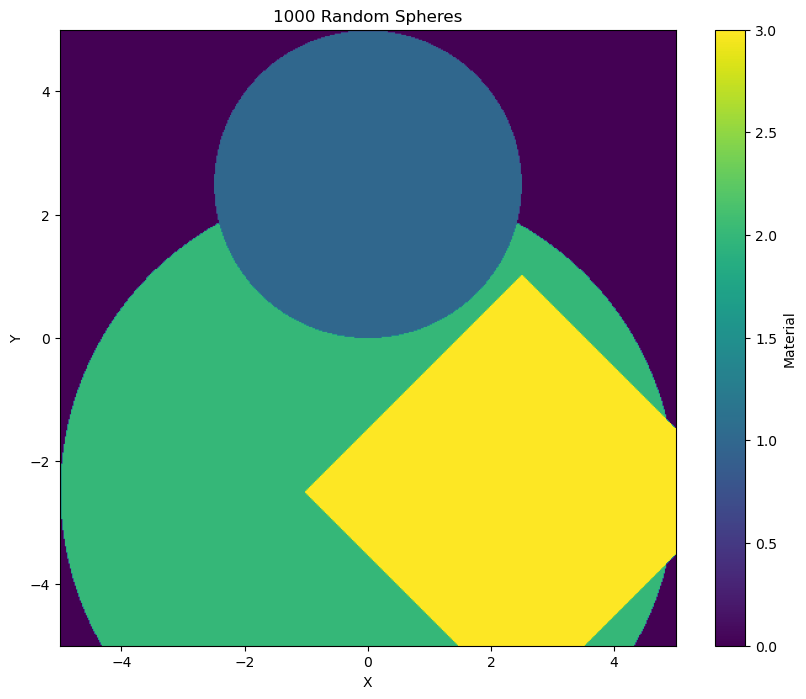

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time 

sphere1 = Sphere(material=1, center=(0, -0.5, 0), radius=0.5)
sphere2 = Sphere(material=2, center=(0, 0.5, 0), radius=1)
block = Block(material=3, center=(0.5, 0.5, 0), e1=(1, 1, 0), e2=(1, -1, 0), e3=(0, 0, 1), size=(1, 1, 1))
group = GroupObject([sphere2, sphere1, block])

# Create a grid of points
x = np.linspace(-1, 1, 500)
y = np.linspace(-1, 1, 500)
xx, yy = np.meshgrid(x, y)

def get_epsilon(x, y):
    mat = group.query_material_at_point((x, y, 0))
    return 0 if mat is None else mat
point_in_object_vec = np.vectorize(get_epsilon)

start_time = time.time()
material_map = point_in_object_vec(xx, yy)
end_time = time.time()
print(f"Time taken: {end_time - start_time} seconds")

# Create the plot
plt.figure(figsize=(10, 8))
plt.imshow(material_map, cmap='viridis', extent=[-5, 5, -5, 5])
plt.colorbar(label='Material')
plt.title('1000 Random Spheres')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Time taken: 0.34314489364624023 seconds


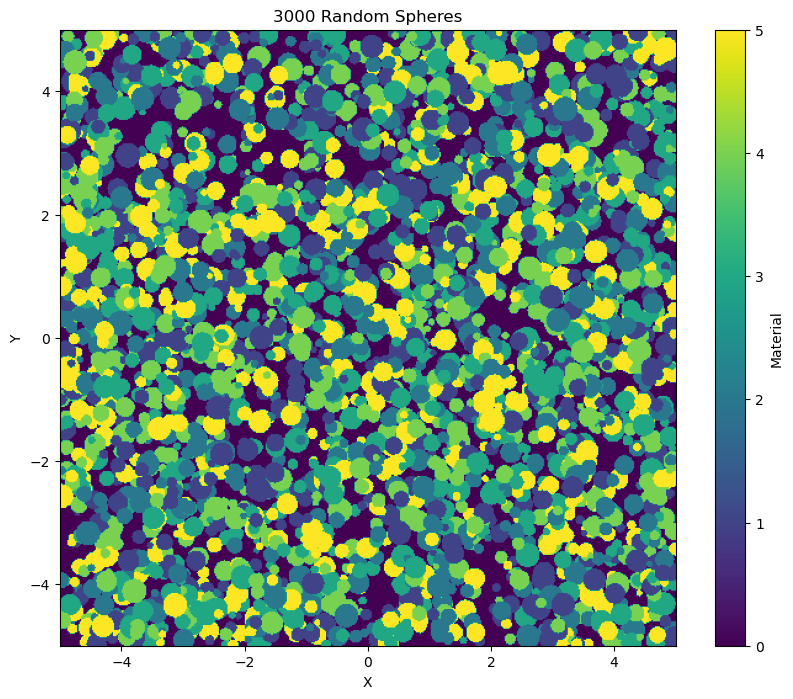

In [18]:
np.random.seed(42)
spheres = []
for _ in range(3000):
    x = np.random.uniform(-5, 5)
    y = np.random.uniform(-5, 5)
    radius = np.random.uniform(0.05, 0.2)
    material = np.random.randint(1, 6)
    
    sphere = Sphere(material=material, center=(x, y, 0), radius=radius)
    spheres.append(sphere)

group = GroupObject(spheres)

x = np.linspace(-5, 5, 500)
y = np.linspace(-5, 5, 500)
xx, yy = np.meshgrid(x, y)

def get_epsilon(x, y):
    mat = group.query_material_at_point((x, y, 0))
    return 0 if mat is None else mat
point_in_object_vec = np.vectorize(get_epsilon)

start_time = time.time()
material_map = point_in_object_vec(xx, yy)
end_time = time.time()
print(f"Time taken: {end_time - start_time} seconds")

# Create the plot
plt.figure(figsize=(10, 8))
plt.imshow(material_map, cmap='viridis', extent=[-5, 5, -5, 5])
plt.colorbar(label='Material')
plt.title('3000 Random Spheres')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Number of spheres: 1000, Time taken: 0.26 seconds
Number of spheres: 2000, Time taken: 0.30 seconds
Number of spheres: 3000, Time taken: 0.36 seconds
Number of spheres: 5000, Time taken: 0.57 seconds
Number of spheres: 7000, Time taken: 0.87 seconds
Number of spheres: 10000, Time taken: 1.54 seconds
Number of spheres: 15000, Time taken: 3.34 seconds


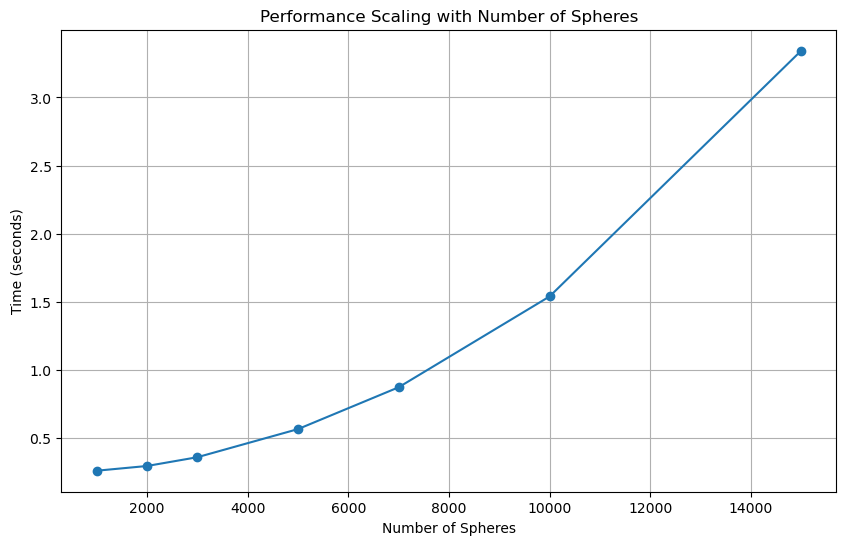

In [20]:
# benchmark
sphere_counts = [1000, 2000, 3000, 5000, 7000, 10000, 15000]
times = []

for num_spheres in sphere_counts:
    np.random.seed(42)
    spheres = []
    for _ in range(num_spheres):
        x = np.random.uniform(-5, 5)
        y = np.random.uniform(-5, 5)
        radius = np.random.uniform(0.05, 0.2)
        material = np.random.randint(1, 6)
        
        sphere = Sphere(material=material, center=(x, y, 0), radius=radius)
        spheres.append(sphere)

    group = GroupObject(spheres)
    
    # Measure query time
    start_time = time.time()
    material_map = point_in_object_vec(xx, yy)
    end_time = time.time()
    
    elapsed_time = end_time - start_time
    times.append(elapsed_time)
    print(f"Number of spheres: {num_spheres}, Time taken: {elapsed_time:.2f} seconds")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sphere_counts, times, 'o-')
plt.grid(True)
plt.xlabel('Number of Spheres')
plt.ylabel('Time (seconds)')
plt.title('Performance Scaling with Number of Spheres')
plt.show()